In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset/train.csv')


In [3]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
df.shape


(14999, 9)

In [5]:
df.describe()


,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


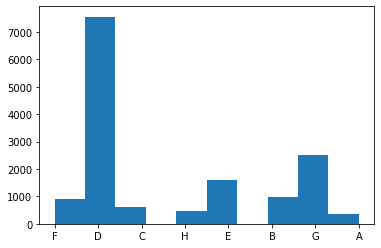

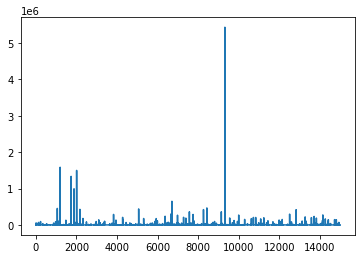

In [7]:
# Visualization
# Individual Plots
plt.hist(df["category"])
plt.show()
plt.plot(df["adview"])
plt.show()

In [8]:
df = df[df["adview"] <50000]
df.shape


(14900, 9)

In [9]:
df=df[df.views !='F']
df=df[df.likes !='F']
df=df[df.dislikes !='F']
df=df[df.comment !='F']

In [10]:
df['views']=pd.to_numeric(df['views'])
df['adview']=pd.to_numeric(df['adview'])
df['likes']=pd.to_numeric(df['likes'])
df['dislikes']=pd.to_numeric(df['dislikes'])

In [11]:
data_train=df

In [12]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_train['vidid']=label_encoder.fit_transform(data_train['vidid'])
data_train['published']=label_encoder.fit_transform(data_train['published'])
data_train['duration']=label_encoder.fit_transform(data_train['duration'])

In [14]:
data_train.head() 

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5857,40,1031602,8523,363,1095,2168,2924,F
1,2711,2,1707,56,2,6,2185,3039,D
2,8076,1,2023,25,0,2,2094,1862,C
3,8929,6,620860,777,161,153,2119,2545,H
4,120,1,666,1,0,0,2091,1962,D


In [15]:
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("/content/drive/MyDrive/dataset/train.csv")
mp = pd.read_csv("/content/drive/MyDrive/dataset/train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h,m,s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5857,40,1031602,8523,363,1095,2168,457,F
1,2711,2,1707,56,2,6,2185,570,D
2,8076,1,2023,25,0,2,2094,136,C
3,8929,6,620860,777,161,153,2119,262,H
4,120,1,666,1,0,0,2091,31,D


In [16]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train['category']=data_train['category'].map(category)

In [17]:
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5857,40,1031602,8523,363,1095,2168,457,6
1,2711,2,1707,56,2,6,2185,570,4
2,8076,1,2023,25,0,2,2094,136,3
3,8929,6,620860,777,161,153,2119,262,8
4,120,1,666,1,0,0,2091,31,4


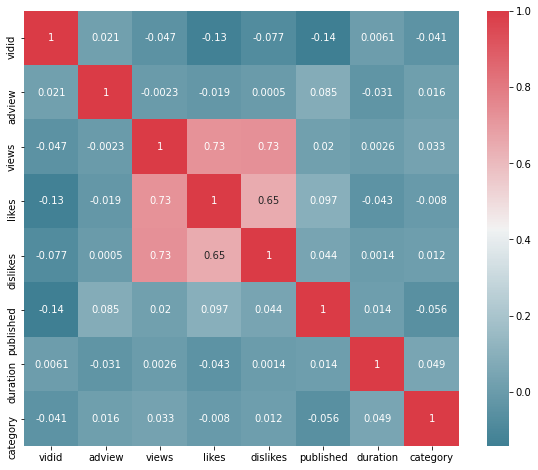

In [18]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [19]:
Y_train = pd.DataFrame(data= data_train.iloc[:,1].values,columns=['target'])
data_train = data_train.drop(['adview'],axis=1)
data_train= data_train.drop(['vidid'],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data_train,Y_train,test_size=0.2,random_state=42)
X_train,X_test,Y_train,Y_test

(          views  likes  dislikes comment  published  duration  category
 9265     842042   4170       205     346       1001      2987         4
 3432      77306    680        15     175       1025       408         1
 10251    224657    193        70      19       2136      1449         5
 1761     146645    495        60     139        699        27         5
 9927      49980    134         8      22       1239       785         4
 ...         ...    ...       ...     ...        ...       ...       ...
 5348     254203    153        35       4       1977       533         4
 13832     21606     71         6      28        976       162         4
 5554     654700    328        21      41        360       204         7
 886    64310773  20397     10258      23       1790         0         8
 7492     963130   2428       419    1489       2021       604         4
 
 [11636 rows x 7 columns],
          views  likes  dislikes comment  published  duration  category
 2140    145860   1210 

In [21]:
from sklearn.preprocessing import MinMaxScaler
scalerx=MinMaxScaler()
scalery=MinMaxScaler()
X_train=scalerx.fit_transform(X_train)
X_test=scalerx.transform(X_test)
Y_train=scalery.fit_transform(Y_train)
X_train,X_test

(array([[6.09928502e-03, 1.46922036e-02, 4.14568545e-03, ...,
         4.20058749e-01, 7.05862892e-02, 4.28571429e-01],
        [5.59639406e-04, 2.39585095e-03, 3.03342838e-04, ...,
         4.30130088e-01, 9.64151523e-03, 0.00000000e+00],
        [1.62703040e-03, 6.79998873e-04, 1.41559991e-03, ...,
         8.96349140e-01, 3.42415578e-02, 5.71428571e-01],
        ...,
        [4.74220455e-03, 1.15564575e-03, 4.24679973e-04, ...,
         1.51070080e-01, 4.82075762e-03, 8.57142857e-01],
        [4.65858309e-01, 7.18649586e-02, 2.07446056e-01, ...,
         7.51154008e-01, 0.00000000e+00, 1.00000000e+00],
        [6.97643034e-03, 8.55459722e-03, 8.47337661e-03, ...,
         8.48090642e-01, 1.42732235e-02, 4.28571429e-01]]),
 array([[1.05623544e-03, 4.26320537e-03, 1.41559991e-04, ...,
         7.84305497e-01, 4.51355247e-03, 7.14285714e-01],
        [5.80892911e-04, 3.06527989e-04, 4.04457117e-04, ...,
         2.87872430e-01, 3.87551102e-03, 2.85714286e-01],
        [1.20829869e-03, 

In [22]:
from sklearn import metrics
def print_errors(X_test,Y_test,model):
  Y_pred=model.predict(X_test)
  Y_pred=Y_pred.reshape(-1,1)
  Y_pred=scalery.inverse_transform(Y_pred)
  print("Mean Absolute Error:",metrics.mean_absolute_error(Y_test,Y_pred))
  print("Mean Squared Error:",metrics.mean_squared_error(Y_test,Y_pred))
  print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
  from sklearn.metrics import mean_squared_error,r2_score
  msc=mean_squared_error(Y_test,Y_pred)      
  r2_score=r2_score(Y_test,Y_pred)  
  print("r2_score is",r2_score)

from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
model=linear_regression.fit(X_train,Y_train)
print("Linear Regression")
print_errors(X_test,Y_test,model)
print("")

from sklearn.svm import SVR
support_vector_regressor=SVR()
model=support_vector_regressor.fit(X_train,Y_train)
print("Support Vector Regressor")
print_errors(X_test,Y_test,model)
print("")

from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor=DecisionTreeRegressor()
model=decision_tree_regressor.fit(X_train,Y_train)
print("Decision Tree Regressor")
print_errors(X_test,Y_test,model)
print("")

from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators = 50,max_depth = 25,min_samples_split=15,min_samples_leaf=2)
req_model= random_forest_regressor.fit(X_train,Y_train)
print("Random Forest Regressor")
print_errors(X_test,Y_test,req_model)

Linear Regression
Mean Absolute Error: 662.1516581692035
Mean Squared Error: 5751385.96224477
Root Mean Squared Error: 2398.20473734933
r2_score is 0.008751738568901657



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Regressor
Mean Absolute Error: 4872.028074191567
Mean Squared Error: 26161729.376480423
Root Mean Squared Error: 5114.853798153024
r2_score is -3.5089599151759128

Decision Tree Regressor
Mean Absolute Error: 518.4464192875547
Mean Squared Error: 9435803.087106176
Root Mean Squared Error: 3071.7752338193914
r2_score is -0.6262555611290639



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forest Regressor
Mean Absolute Error: 498.472914417579
Mean Squared Error: 4837811.966625435
Root Mean Squared Error: 2199.50266347314
r2_score is 0.16620572284174273


In [23]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu",input_shape=X_train.shape[1:]),Dense(6,activation="relu"),Dense(1)])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,Y_train,epochs=100)
ann.summary()
print_errors(X_test,Y_test,ann)

Epoch 1/100
364/364 [==============================] - 1s 769us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 2/100
364/364 [==============================] - 0s 795us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 3/100
364/364 [==============================] - 0s 765us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 4/100
364/364 [==============================] - 0s 758us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 5/100
364/364 [==============================] - 0s 826us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 6/100
364/364 [==============================] - 0s 806us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 7/100
364/364 [==============================] - 0s 768us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 8/100
364/364 [==============================] - 0s 798us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 9/100
364/364 [==============================] - 0s 754us/step - loss: 0.0032 - mean_squar

In [24]:
import joblib
joblib.dump(decision_tree_regressor, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [25]:
ann.save("ann_youtubeadview.h5")


In [29]:
def predict(data_test):
  category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
  data_test['category']=data_test['category'].map(category)
  data_test=data_test[data_test.views !='F']
  data_test=data_test[data_test.likes !='F']
  data_test=data_test[data_test.dislikes !='F']
  data_test=data_test[data_test.comment !='F']
  data_test['views']=pd.to_numeric(data_test['views'])
  data_test['likes']=pd.to_numeric(data_test['likes'])
  data_test['dislikes']=pd.to_numeric(data_test['dislikes'])
  data_test['comment']=pd.to_numeric(data_test['comment'])
  label_enc = LabelEncoder()
  data_test['vidid']=label_enc.fit_transform(data_test['vidid'])
  data_test['published']=label_enc.fit_transform(data_test['published'])
  data_test['duration']=label_enc.fit_transform(data_test['duration'])

  mp = pd.read_csv("/content/drive/MyDrive/dataset/test.csv")["duration"]
  time = mp.apply(checki)
  time1=time.apply(func_sec)
  data_test["duration"]=time1

  data_test= data_test.drop(['vidid'],axis=1)

  data_test=scalerx.transform(data_test)

  predictions=req_model.predict(data_test)
  predictions=predictions.reshape(-1,1)
  predictions=scalery.inverse_transform(predictions)
  return predictions

In [30]:
data_test= pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
pred= predict(data_test)
pred= np.ceil(pred)
pred_df= pd.DataFrame(pred,columns=['Adviews'])
pred_df

,Adviews
0,14.0
1,7.0
2,4.0
3,30.0
4,102.0
...,...
8544,7.0
8545,5.0
8546,7.0
8547,9.0


In [31]:
pred_df.to_csv('predictions.csv')